<a href="https://colab.research.google.com/github/yonakisaragi/DataScience/blob/main/Compfest_Indonesia's_Public_Mobility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Identification

In [3]:
df = pd.read_csv('mobility.csv')
df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-01,3,24,46,-15.0,-49,6
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-02,11,35,28,-4.0,-4,3
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-03,14,36,20,-9.0,-10,4
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-04,11,33,15,-9.0,-8,4
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2022-01-05,12,34,17,-10.0,-7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6365,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-27,43,74,83,23.0,7,17
6366,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-28,35,68,70,22.0,4,18
6367,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-29,35,66,68,10.0,6,20
6368,ID,Indonesia,West Sumatra,NaN,NaN,ID-SB,NaN,ChIJRUJ08Ey51C8RVTvVdblRsXA,2022-06-30,44,74,74,25.0,5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 6370 non-null   object 
 1   country_region                                      6370 non-null   object 
 2   sub_region_1                                        6188 non-null   object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     6188 non-null   object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            6370 non-null   object 
 8   date                                                6370 non-null   object 
 9

In [8]:
df.describe()

,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,0.0,0.0,6370.000000,6370.000000,6370.000000,6188.000000,6370.000000,6370.000000
mean,NaN,NaN,NaN,15.108477,42.924019,44.735008,-1.489496,5.387441,10.759812
std,NaN,NaN,NaN,16.185842,24.337003,45.712422,26.506115,21.113023,6.749220
min,NaN,NaN,NaN,-88.000000,-90.000000,-71.000000,-97.000000,-92.000000,-11.000000
25%,NaN,NaN,NaN,6.000000,28.000000,12.000000,-17.000000,-3.000000,6.000000
50%,NaN,NaN,NaN,13.000000,40.000000,37.000000,-2.000000,7.000000,12.000000
75%,NaN,NaN,NaN,25.000000,56.000000,68.000000,14.000000,18.000000,15.000000
max,NaN,NaN,NaN,133.000000,217.000000,393.000000,244.000000,63.000000,46.000000


In [9]:
df.isna().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                           182
sub_region_2                                          6370
metro_area                                            6370
iso_3166_2_code                                        182
census_fips_code                                      6370
place_id                                                 0
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline          182
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 0
dtype: int64

In [10]:
df.duplicated().any()

False

### Interpretasi

1. Terdapat tiga kolom yang isinya null semua yaitu 'sub_region_2', 'metro_area', 'census_fips_code'
2. Terdapat 182 null data pada tiga kolom yaitu sub_region_1, iso_3166_2_code, transit_stations_percent_change_from_baseline
3. Data date masih berupa text/object namun karena tidak akan digunakan maka akan dibiarkan
4. Data transit_stations_percent_change_from_baseline tipenya float harus diubah ke int agar seragam
5. Tidak ada data duplikat

# Problem Statement

Berdasarkan asumsi (2022), pada 5 Juli 2022 Menteri Koordinator Bidang Kemaritiman dan Investasi, Luhut Binsar Pandjaitan mengatakan bahwa dua minggu lagi, pemerintah akan menerapkan persyaratan vaksinasi booster sebagai syarat masuk ke Mall, perkantoran, dan perjalanan baik udara, darat, maupun laut.

Hal ini merupakan salah satu kebijakan pemerintah untuk menghadapi angka jumlah kasus Covid-19 yang melonjak lagi baru-baru ini serta angka vaksinasi booster yang masih rendah. Oleh karena itu, kami ingin menganalisis apakah kebijakan tersebut sudah tepat sasaran berdasarkan data mobilitas dari masyarakat terhadap ketiga tempat tersebut.

1. Apakah ada hubungan antar data?
2. Bagaimana hubungan data workplaces, train_station, dan retail?
3. Apakah data yang paling mempengaruhi data workplace berdasarkan kedua data tersebut?
4. Prediksi nilai peningkatan data workplace berdasarkan data yang paling mempengaruhi.

### Hipotesis

1. Mobilitas workplace akan mempengaruhi mobilitas lain.
2. Berdasarkan topik utama, mobilitas workplace akan sangat mempengaruhi mobilitas retail dan transit
3. Mobilitas workplace sangat berpengaruh karena kecenderungan pekerja/karyawan untuk mampir ke tempat lain sebelum pulang atau berangkat kerja.
4. Selain itu, kemungkinan seseorang akan datang ke mall atau grocery juga akan meningkat saat mereka bekerja karena area perkantoran cenderung dekat dengan pusat kota yang merupakan area Mall atau Grocery.

# Data Cleaning and Pre-Processing

In [11]:
df = df.drop(columns=['sub_region_2', 'metro_area', 'census_fips_code'])

In [12]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 182 to 6369
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 6006 non-null   object 
 1   country_region                                      6006 non-null   object 
 2   sub_region_1                                        6006 non-null   object 
 3   iso_3166_2_code                                     6006 non-null   object 
 4   place_id                                            6006 non-null   object 
 5   date                                                6006 non-null   object 
 6   retail_and_recreation_percent_change_from_baseline  6006 non-null   int64  
 7   grocery_and_pharmacy_percent_change_from_baseline   6006 non-null   int64  
 8   parks_percent_change_from_baseline                  6006 non-null   int64  


# Exploratory Data Analysis

In [15]:
df['transit_stations_percent_change_from_baseline'] = pd.to_numeric(df['transit_stations_percent_change_from_baseline'], downcast = 'integer')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 182 to 6369
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   country_region_code                                 6006 non-null   object
 1   country_region                                      6006 non-null   object
 2   sub_region_1                                        6006 non-null   object
 3   iso_3166_2_code                                     6006 non-null   object
 4   place_id                                            6006 non-null   object
 5   date                                                6006 non-null   object
 6   retail_and_recreation_percent_change_from_baseline  6006 non-null   int64 
 7   grocery_and_pharmacy_percent_change_from_baseline   6006 non-null   int64 
 8   parks_percent_change_from_baseline                  6006 non-null   int64 
 9   transi

In [17]:
cat = ['country_region_code', 'country_region', 'sub_region_1', 'place_id', 'date']
num = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

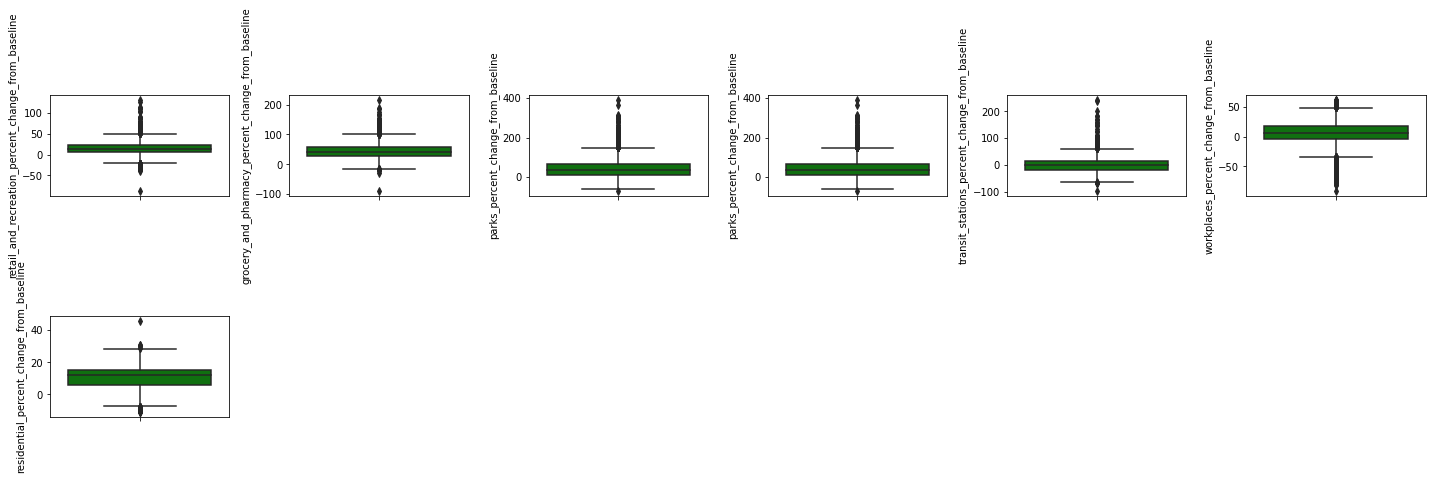

In [19]:
# Univariate Analysis
features = num
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

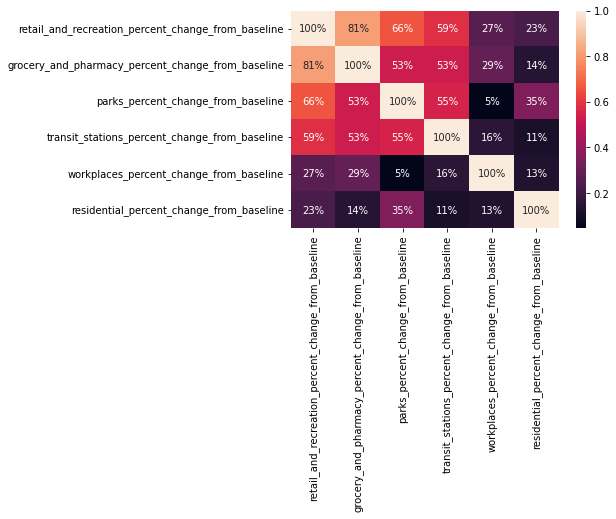

In [20]:
# Multivariate Analysis

sns.heatmap(df.corr(), annot=True, fmt='.0%');

### Interpretasi

1. Pada analisis univariate terdapat banyak outlier, namun tidak akan dihapus karena kemungkinan nilai itu muncul karena kebijakan tertentu atau hari spesial tertentu yang membuat mobilitas meningkat.
2. Data yang memiliki hubungan tertinggi yaitu retail dengan grocery dengan angka 82%
3. Data workplace, transit, dan retail memiliki hubungan diatas 15%
4. Workplace memiliki korelasi tertinggi dengan grocery dan retail yaitu 29% dan 27%

# Modelling

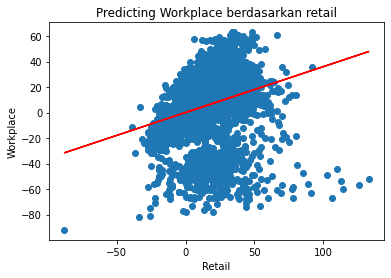

In [22]:
from sklearn.linear_model import LinearRegression

# Create x y data using numpy array
y = np.array(df['workplaces_percent_change_from_baseline']).reshape(-1,1)
X = np.array(df['retail_and_recreation_percent_change_from_baseline']).reshape(-1,1)

# Predict workplace value using retail data
regressor = LinearRegression()
regressor.fit(X, y)

# Predicting the Test set results
y_pred = regressor.predict(X)

# Visualization
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Predicting Workplace berdasarkan retail')
plt.xlabel('Retail')
plt.ylabel('Workplace')
plt.show()

In [23]:
# y = mx+c
print(f"Persamaan Garis : y = {regressor.coef_[0]} X + {regressor.intercept_}")

Persamaan Garis : y = [0.35926149] X + [0.09332607]


In [26]:
# Predict workplace value using the model and retail value

mobilitas_retail = float(input())
hasil = regressor.predict([[mobilitas_retail]])
print("Mobilitas Workplace berdasarkan Mobilitas Retail sebesar ", int(mobilitas_retail), "% adalah : ", int(hasil), "%")

25
Mobilitas Workplace berdasarkan Mobilitas Retail sebesar  25 % adalah :  9 %


In [31]:
mobilitas_retail = float(input())
hasil = regressor.predict([[mobilitas_retail]])
print("Mobilitas Workplace berdasarkan Mobilitas Retail sebesar ", int(mobilitas_retail), "% adalah : ", int(hasil), "%")

45
Mobilitas Workplace berdasarkan Mobilitas Retail sebesar  45 % adalah :  16 %


In [34]:
mobilitas_retail = float(input())
hasil = regressor.predict([[mobilitas_retail]])
print("Mobilitas Workplace berdasarkan Mobilitas Retail sebesar ", int(mobilitas_retail), "% adalah : ", int(hasil), "%")

65
Mobilitas Workplace berdasarkan Mobilitas Retail sebesar  65 % adalah :  23 %


In [35]:
mobilitas_retail = float(input())
hasil = regressor.predict([[mobilitas_retail]])
print("Mobilitas Workplace berdasarkan Mobilitas Retail sebesar ", int(mobilitas_retail), "% adalah : ", int(hasil), "%")

85
Mobilitas Workplace berdasarkan Mobilitas Retail sebesar  85 % adalah :  30 %


# Conclusion

Berdasarkan hasil pemodelan dapat disimpulkan bahwa:
<br><br>
1. Mobilitas retail memiliki korelasi positif dengan mobilitas workplace
2. Setiap kenaikan 20% dari mobilitas retail akan menaikan 7% dari mobilitas workplace
3. Mobilitas workplace memiliki pengaruh yang cukup besar terhadap mobilitas retail karena setiap 7% kenaikan mobilitas workplace dapat menambah 20% mobilitas ke retail
4. Hal ini sesuai dengan hipotesis bahwa tingkat mobilitas masyarakat ke tempat kerja akan mempengaruhi secara signifikan tingkat mobilitas ke Mall atau retail.
5. Berdasarkan hasil EDA dan modelling juga dapat dikatakan bahwa mobilitas workplace sangat mempengaruhi mobilitas lainnya seperti grocery, transit station, dan residential.
6. Hal tersebut dikarenakan masyarakat yang bekerja cenderung akan mampir atau bermobilitas ke tempat - tempat lain sebelum pulang ke rumah selain itu jika berhubungan dengan residential maka jelas masyarakat yang bekerja akan pulang ke rumah sehingga nilai kedua data tersebut akan selaras.

### Rekomendasi

1. Kebijakan tersebut sudah cukup tepat untuk dilaksanakan mengingat ketiga tempat tersebut memang sangat berkaitan, jika salah satu saja yang mendapatkan aturan yang terlalu ketat, dapat menyebabkan tempat lain membludak
2. Sebaiknya aturan pada tempat kerja dan Mall lebih diperketat daripada stasiun atau aturan di stasiun dilonggarkan, karena kecilnya peningkatan mobilitas ke transit station menunjukkan banyaknya pekerja menggunakan kendaraan pribadi atau ojek online yang akan meningkatkan emisi dan polusi dan pekerja akan lebih memanfaatkan penggunaan kendaraan umum.
3. Selain itu, peningkatan aturan pada workplace juga harus disertai dengan aturan yang selaras untuk Mall dan mungkin sektor pendidikan juga, karena mahasiswa dan siswa masih banyak yang belajar daring sehingga kesempatan mereka untuk mengunjungi Mall lebih besar daripada karyawan.

### Daftar Pustaka

https://www.instagram.com/p/CfoLB-wPIcN/?utm_source=ig_web_copy_link